# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


# Team members - Group 66

* César Guillermo Vázquez Álvarez - A01197857
* Francisco Vázquez Martínez - A01797089
* Manuel Alejandro Vázquez Meza - A01796404
* Ricardo Andrés Vargas Martínez - A01797243


In [268]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
from typing import List

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
CURRENT_PATH = os.getcwd()
DATA_PATH = f'{CURRENT_PATH}/asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [270]:
train_df.shape

(27455, 785)

In [271]:
valid_df.shape

(7172, 785)

In [272]:
for column in train_df.columns:
    print(column)

label
pixel1
pixel2
pixel3
pixel4
pixel5
pixel6
pixel7
pixel8
pixel9
pixel10
pixel11
pixel12
pixel13
pixel14
pixel15
pixel16
pixel17
pixel18
pixel19
pixel20
pixel21
pixel22
pixel23
pixel24
pixel25
pixel26
pixel27
pixel28
pixel29
pixel30
pixel31
pixel32
pixel33
pixel34
pixel35
pixel36
pixel37
pixel38
pixel39
pixel40
pixel41
pixel42
pixel43
pixel44
pixel45
pixel46
pixel47
pixel48
pixel49
pixel50
pixel51
pixel52
pixel53
pixel54
pixel55
pixel56
pixel57
pixel58
pixel59
pixel60
pixel61
pixel62
pixel63
pixel64
pixel65
pixel66
pixel67
pixel68
pixel69
pixel70
pixel71
pixel72
pixel73
pixel74
pixel75
pixel76
pixel77
pixel78
pixel79
pixel80
pixel81
pixel82
pixel83
pixel84
pixel85
pixel86
pixel87
pixel88
pixel89
pixel90
pixel91
pixel92
pixel93
pixel94
pixel95
pixel96
pixel97
pixel98
pixel99
pixel100
pixel101
pixel102
pixel103
pixel104
pixel105
pixel106
pixel107
pixel108
pixel109
pixel110
pixel111
pixel112
pixel113
pixel114
pixel115
pixel116
pixel117
pixel118
pixel119
pixel120
pixel121
pixel122
pixe

### Importar Images

In [273]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [274]:
def split_val_test(x_data, y_data, pct_train_data=0.5, shuffle=True, seed=42):
    '''
    Create a function that will allow you to split the previously loaded validation set
    into validation and test.
    '''
    # We got the total number of rows
    total_data = x_data.shape[0]
    # If it's requested to shuffle de data we generate dummy indexes and them we disorder them at random.
    if shuffle: 
        indexes = np.arange(total_data)
        # We add here a seed to make sure the results are reproducible
        np.random.seed(seed=seed)
        np.random.shuffle(indexes)
        reordered_x = x_data[indexes]
        reordered_y = y_data[indexes]
    # Calculate the amount of validation data that should be assigned and the rest will be test
    mid_index = int(total_data * pct_train_data)
    x_validation, x_test = np.split(reordered_x, [mid_index], axis=0)
    y_validation, y_test = np.split(reordered_y, [mid_index], axis=0)
    return x_validation, y_validation, x_test, y_test

    

In [275]:
x_val2, y_val2, x_test, y_test = split_val_test(x_val, y_val, pct_train_data=0.5)

In [276]:
### The following
# Check if this is needed
alphabet=list(string.ascii_lowercase)
print(alphabet)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
24


### Normalise

In [277]:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [278]:
# Here we normalized data using information from train data
x_std = np.std(x_train)
x_mean = np.mean(x_train)
x_train_n = normalise(x_mean, x_std,x_train)
x_test_n = normalise(x_mean, x_std,x_test)
x_val_n = normalise(x_mean, x_std,x_val2)


In [279]:
# Here we compare the mean and standard deviation before and after normalize the data.
x_train.mean(), x_train.std(), x_train_n.mean(), x_train_n.std()

(np.float32(159.29102),
 np.float32(48.769505),
 np.float32(-1.5389283e-07),
 np.float32(1.0))

### Graficar muestras

In [280]:
import math
def plot_images(images, figsize=(20,20)):
    if len(images)>1:
        plt.figure(figsize=figsize)
        _, axes = plt.subplots(5, math.ceil(len(images)/5))
        axes = axes.ravel()
        for index, item in enumerate(images):

            axes[index].imshow(item["image"].squeeze(), cmap=plt.get_cmap('gray'))
            axes[index].set_title(item["title"])
            axes[index].axis('off')
    else:
        plt.figure(figsize=(5,5))
        plt.imshow(images[0]["image"].squeeze(),cmap=plt.get_cmap('gray'))
        plt.title(images[0]["title"])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Findings

* We have printed all the different images for the different labels the dataset has. However, we just notice that the images doesn't really match with the letter it represents according to the in the source page of the dataset. Check asl dataset link for comparison https://www.kaggle.com/datasets/grassknoted/asl-alphabet/data 


<Figure size 3000x3000 with 0 Axes>

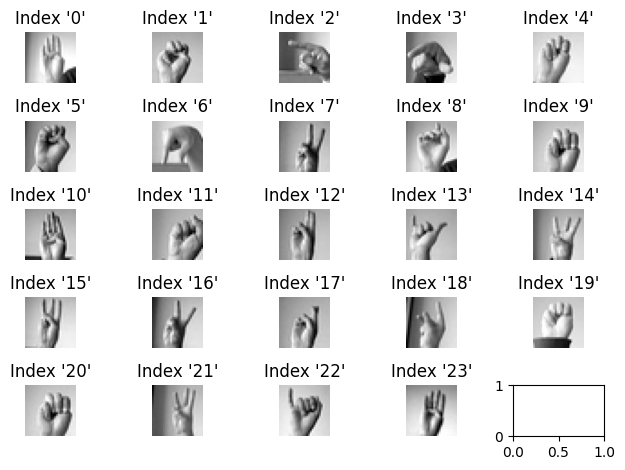

In [281]:
images = []

#for index, letter in enumerate(alphabet):
for index, letter in enumerate(np.unique(y_train)):
    # first_match_index = y_test[y_test == index][0]
    first_match_index = y_train[y_train == letter][0]
    images.append({
        "title":f"Index '{letter}'",
        "image": x_test[first_match_index].reshape(28,28)
    })

plot_images(images, (30,30))


### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [282]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle: 
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]  
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Nuestra clase Linear, ReLU y Sequential

###  Clase NP_Tensor

In [283]:
# We are creating our 'dummy' class that allow us to add new attributes dynamically.
# Something that allows to improve the readability of this code is to mention that the grad attribute is going to be of the same type the NP_Tensor class. Instead of just letting python discover this on execution time.
from typing import Self
class NP_Tensor(np.ndarray):
    grad: Self

In [284]:
# Not part of the solution just some simple test
test_np_tensor = NP_Tensor(shape=(10,10))
test_numpy_array = np.ndarray(shape=(10,10))
print(f"Type of np_tensor: [{type(test_np_tensor)}], Type of numpy_array: [{type(test_numpy_array)}]")

Type of np_tensor: [<class '__main__.NP_Tensor'>], Type of numpy_array: [<class 'numpy.ndarray'>]


In [285]:
# Because the inheritance the test_np_tensor can be considered the same as ndarray.
# Not part of the solution just some simple test
isinstance(test_np_tensor, np.ndarray)
test_np_tensor.grad = test_numpy_array

###  Clase Layer

In [286]:
# The class relu and class linear are two classes that will work as layers in our handcrafted network, so, to improve a bit the readability we will create a abstract class that helps us later.
from abc import ABC, abstractmethod

class Layer(ABC):

    def __call__(self, input:NP_Tensor):
        return self._forward(input)

    @abstractmethod
    def _forward(self, input:NP_Tensor) -> NP_Tensor:
        """
            This method should be the one used to apply the transformation of the data forward within the layers
            This method is 'private' and each layer should implement their own version of this transformation
            Args:
                input (NP_Tensor): The input data that will be processed. This method can be a linear function or the relu function.
            Returns:
                NP_Tensor: Data transformed and it should be NP_Tensor object.
        """
        pass

    @abstractmethod
    def backward(self, input:NP_Tensor, output:NP_Tensor):
        """
            This method should be the one used to apply the transformation of the data backward within the layers
            This method is 'public' and each layer should implement their own version of this transformation
            At this function all the de
            Args:
                input (NP_Tensor): This should be the original input data the layer received the first time it apply the forward transformation.
                output (NP_Tensor): This should be the output that the layer created but with the gradient transformation already applied on that data and should be stored in the grad attribute of the NP_Tensor class.
        """
        pass

###  Clase Linear

#### Initialization of b (bias) and W (weights) 

For initializing the weight this class will use the approach Kaiming He. Kaiming Initialization is a weight initialization technique in deep learning that adjusts the initial weights of neural network layers to facilitate efficient training by addressing the vanishing or exploding gradient problem. After applying multiple times the derivative during the back propagation the values of W can become so small that the top layers don't learn anything, while exploding means that the values of W becomes bigger and bigger causing the values of W tends to infinitive causing overflow issues.

Something to highlight, it's that this method of initializing the weights is suggested only when the activation function is RELU. The calculation of the values is based on random numbers with a gaussian probabilistic distribution with a mean of 0 and a deviation standard of square root of 2 divided by the total of elements. The 2 of the formula 

Info was taken from:

* [kaiming-initialization-in-deep-learning](https://www.geeksforgeeks.org/deep-learning/kaiming-initialization-in-deep-learning/)
* [vanishing-and-exploding-gradients-problems-in-deep-learning](https://www.geeksforgeeks.org/deep-learning/vanishing-and-exploding-gradients-problems-in-deep-learning/)
* [python-normal-distribution-in-statistics](https://www.geeksforgeeks.org/python/python-normal-distribution-in-statistics/)

In [287]:
class Linear(Layer):
    def __init__(self, input_size, output_size, seed=42):
        '''
        Init parameters utilizando Kaiming He
        '''
        np.random.seed(seed=seed)
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(NP_Tensor) # Double check why is the input size being divided by 2 instead of the being 2 divided by the input size.
        # self.W = (np.random.Generator.standard_normal(output_size, input_size) / np.sqrt(input_size/2)).view(NP_Tensor) # Double check why is the input size being divided by 2 instead of the being 2 divided by the input size.
        self.b = (np.zeros((output_size, 1))).view(NP_Tensor)
        super().__init__()

    def _forward(self, input:NP_Tensor) -> NP_Tensor:
        """
            Forward function, where is applied the linear transformation.
            $$z^1 = W^1 X + b^1$$
            In other words we are calculating linear function and returning the information in Z, the @ operator is used for matrix multiplication, introduced in Python 3.5.

            A = np.array([[1, 2], 
                          [3, 4]])
            B = np.array([[5, 6], 
                          [7, 8]])
            C = A @ B
            print(C)
            [
             [19 22]
             [43 50]
            ]
        """

        Z = self.W @ input + self.b
        return Z
    
    def backward(self, input:NP_Tensor, output:NP_Tensor):
        input.grad = self.W.T @ output.grad
        self.W.grad = output.grad @ input.T
        self.b.grad = np.sum(output.grad, axis = 1, keepdims=True)    
    

In [288]:
A = np.array([[1, 2], 
              [3, 4]])
B = np.array([[5, 6], 
              [7, 8]])
A @ B

array([[19, 22],
       [43, 50]])

In [289]:
A + B

array([[ 6,  8],
       [10, 12]])

### Clase ReLU

For the forward method is pretty simple the calculation of values for the input. Basically we should assign between 0 or the input value, and zero will be assigned as long as the input is bigger than cero.
Regarding backward, the function duplicates the last input generated by this layer, and it should have the gradient of the next layer. 
On top of that data the backward applies the derivative function of the RELU. 
Note: The professor code only transforms the negative values to zero but the derivative of RELU says this
* For values lower than zero it should be zero
* For values higher than zero it should be one
* For zero values the derivative is not defined

Based on this we should expect to see something similar to this at the code level.
`input.grad[input > 0] = 1` 
However, as we are doing the gradient descent, if we assign this one to the gradient we won't be decreasing (making smaller) the gradient this will take us away from the minimal value for our loss function that is what we are looking for.

In [290]:
# The class relu and class sequential are two classes that will work as layers from our handcrafted network, so, to improve a bit the readability we will create a abstract class that helps us later.
class ReLU(Layer):
    def __init__(self):
        super().__init__()
        
    def _forward(self, input:NP_Tensor):
        """
            The input for the relu funtion is the result of applying the linear function in the original code the variable was code Z as a reference to the maths behind of this input.
        """
        return np.maximum(0, input)
    
    def backward(self, input:NP_Tensor, output:NP_Tensor):
        """
            The input in this case is similar to the linear layer is basically the information that was delivered by the previous layer (in this case the linear function provided this input) the Z value. 
            The output is the result of being applied the RELU transformation, with the attribute grad (gradient) already populated.
        """
        input.grad = output.grad.copy()
        input.grad[input <= 0] = 0 # Aqui tengo duda no es lo mismo que np.maximun? # Si si es exactamente lo mismo, y respecto a porque no se asigna la segunda parte de la derivada que me

### Clase Sequential

In [291]:
class Sequential_layers():
    def __init__(self, layers:List[Layer]): # We add the type layer to force a bit of typing validation
        '''
        layers - list of objects of type Layer or any object that inherits from Layer class.
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X 
        self.outputs['l0'] = self.x # The first input/output is the initial values.
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x) # After a executing the forward, the input for the next layer is updated and saved as the output of the layer_i.
            self.outputs['l'+str(i)]=self.x
        return self.x
    def backward(self):
        for i in reversed(range(len(self.layers))):
            input = self.outputs['l'+str(i)] # This variable has the original input the current layer has
            output = self.outputs['l'+str(i+1)] # This variable has the original output of the current layer, however, this output has the gradient of the next layer 
            self.layers[i].backward(input=input, output=output)
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue # This validation is made bc the relu layer doesn't have weights and biases that should be updated.
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))   

### Cost Function

In [292]:
def softmaxXEntropy(x:NP_Tensor, y:NP_Tensor):
    """
        This function does three things 
            Applies the last transformation to the process using softmax to transform the information and deliver it in terms of probabilities 
            Applies the lost function over the calculated probabilities 
            Applies the derivative of softmax function on the calculated probabilities 
    """
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)] # In this line is taking the probability assigned for each class from the initial y for the batch data.
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calcular gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx # My understanding is that this is the derivative of the softmax function but I can't understand why in the code implementation the derivative is only subtracting one
    x.grad = probs.copy()
    
    return preds, cost

### Loop de entrenamiento

In [293]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):

    def accuracy(x:NP_Tensor, y:NP_Tensor, mb_size):
        """
            This function was moved inside the function train so we can calculate the accuracy of the model against the validation data.
            The function split the validation data in the same size of chunks that the training and calculates the mean accuracy of all the minibatches.
        """
        correct = 0
        total = 0
        for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
            pred = model(x.T.view(NP_Tensor))
            correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
            total += pred.shape[1]
        return correct/total

    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train_n, y_train)):
            scores = model(x.T.view(NP_Tensor))
            _, cost = softmaxXEntropy(scores, y)
            model.backward()
            model.update(learning_rate)
        print(f'epoch {epoch} - costo: {cost}, accuracy: {accuracy(x_val_n, y_val2, mb_size)}')

### Create your model and train it

In [294]:
num_of_classes = np.unique(y_train).shape[0]
model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, num_of_classes)])
mb_size = 512
learning_rate = 1e-4
epochs = 20


In [295]:
train(model, epochs, mb_size, learning_rate)

epoch 0 - costo: 1.0933439651196526, accuracy: 0.5663692136084774
epoch 1 - costo: 0.588227825898018, accuracy: 0.6692693809258227
epoch 2 - costo: 0.3280432569850527, accuracy: 0.7214166201896264
epoch 3 - costo: 0.21318513837262643, accuracy: 0.724484104852203
epoch 4 - costo: 0.13910506694875102, accuracy: 0.7336865588399331
epoch 5 - costo: 0.10013089511259554, accuracy: 0.7442833240379253
epoch 6 - costo: 0.07289497369716355, accuracy: 0.7518126045733408
epoch 7 - costo: 0.06954378241260843, accuracy: 0.7467930842163971
epoch 8 - costo: 0.05286267297919716, accuracy: 0.7515337423312883
epoch 9 - costo: 0.04523498212846485, accuracy: 0.754601226993865
epoch 10 - costo: 0.032491607432633955, accuracy: 0.7582264361405465
epoch 11 - costo: 0.030983886030845963, accuracy: 0.7573898494143892
epoch 12 - costo: 0.028935819832458454, accuracy: 0.7598996095928612
epoch 13 - costo: 0.02396355490174288, accuracy: 0.7640825432236475
epoch 14 - costo: 0.025258140860622405, accuracy: 0.763245956

### Test your model on Random data from your test set

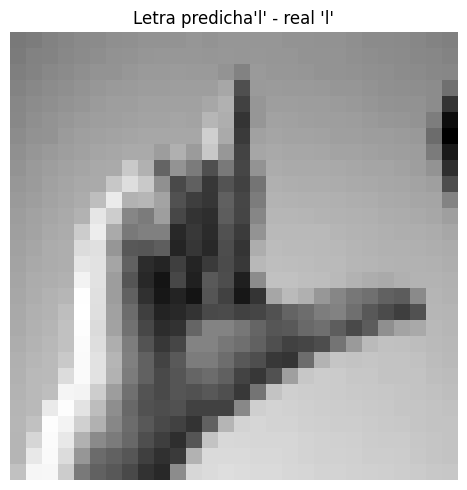

In [ ]:
idx = np.random.randint(len(y_test))
pred = model.predict(x_test[idx].reshape(-1, 1))
plot_images([{
    "image": x_test[idx].reshape(28,28),
    "title":f"Letra predicha '{alphabet[pred]}' - real '{alphabet[y_test[idx]]}'"
}])
# print(f'el valor predicho es: {alphabet[pred]} el valor real es: {alphabet[y_test[idx]]}')